<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-03-02-non-linear-polynomial-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 2. Polynomial Models

A polynomial model is a type of mathematical model that represents a relationship between a dependent variable \( y \) and one or more independent variables \( x \). The relationship is expressed as a polynomial equation:

$$ y = a_n x^n + a_{n-1} x^{n-1} + \cdots + a_1 x + a_0 $$

where:
- $y$ is the dependent variable.
- $x$ is the independent variable.
- $a_0, a_1, \ldots, a_n$ are coefficients.
- $n$ is the degree of the polynomial.




### Applications

Polynomial models have a wide range of applications in various fields. Here are a few examples:

1. **Curve Fitting**: Polynomial models are used to fit curves to a set of data points. This is commonly used in statistics and data analysis to understand the relationship between variables.

2. **Physics**: Polynomial equations are used to describe motion, forces, and other physical phenomena. For example, the trajectory of a projectile can be modeled using a quadratic polynomial.

3. **Economics**: Polynomial models can be used to model economic relationships, such as the relationship between supply and demand or the behavior of financial markets.

4. **Engineering**: Polynomial models are used in control systems, signal processing, and other engineering applications to model system behavior and design controllers.

5. **Machine Learning**: In machine learning, polynomial regression is used to model nonlinear relationships between the features and the target variable.

##  Types of Polynomial Models

Polynomial models can be categorized based on the degree of the polynomial and the number of independent variables. Here are the different types of polynomial models:


### 1. Linear Polynomial (Degree 1)
A linear polynomial is the simplest type of polynomial model. It represents a straight-line relationship between the dependent and independent variables.

$$ y = a_1 x + a_0 $$

### 2. Quadratic Polynomial (Degree 2)

A quadratic polynomial represents a parabolic relationship between the dependent and independent variables. It can model curves that have one peak or trough.

$$ y = a_2 x^2 + a_1 x + a_0 $$

### 3. Cubic Polynomial (Degree 3)

A cubic polynomial represents a relationship that can have up to two peaks or troughs. It can model more complex curves compared to linear and quadratic polynomials.

$$  y = a_3 x^3 + a_2 x^2 + a_1 x + a_0 $$

### 4. Quartic Polynomial (Degree 4)

A quartic polynomial can have up to three peaks or troughs. It can model even more complex relationships between the dependent and independent variables.

$$ y = a_4 x^4 + a_3 x^3 + a_2 x^2 + a_1 x + a_0 $$

### 6. Higher-Degree Polynomials (Degree > 5)

Polynomials of degree higher than 5 can model even more intricate relationships, but they are less commonly used due to the complexity and potential for overfitting.

### 7. Multivariable Polynomials

Polynomials with more than one independent variable are called multivariable polynomials. They can model relationships involving multiple factors.


$$ y = a_{11} x_1^2 + a_{12} x_1 x_2 + a_{22} x_2^2 + a_{1} x_1 + a_{2} x_2 + a_0 $$

### Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314972 sha256=e566171160eac27fc2718439bbb27b76d7478eda2def2c372b03c5c8f04db2be
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## Fit Different Types of Polynomial Models  in R

We will fit differen types of polynomial models to a sample dataset in R.  The dataset contains a set of data points that follow a polynomial relationship. We will fit polynomial models of different degrees to the data and compare the results.


### Install Rrequired R Packages

In [3]:
%%R
# Packages List
packages <- c(
  "tidyverse",   # Includes readr, dplyr, ggplot2, etc.
  'patchwork'    # for visualization
)

In [4]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [5]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
tidyverse patchwork 
     TRUE      TRUE 


### Load R Packages

In [6]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages


Successfully loaded packages:
 [1] "package:patchwork" "package:lubridate" "package:forcats"  
 [4] "package:stringr"   "package:dplyr"     "package:purrr"    
 [7] "package:readr"     "package:tidyr"     "package:tibble"   
[10] "package:ggplot2"   "package:tidyverse" "package:tools"    
[13] "package:stats"     "package:graphics"  "package:grDevices"
[16] "package:utils"     "package:datasets"  "package:methods"  
[19] "package:base"     


Below are examples of how we  can fit different types of polynomial models in R. Each example includes the necessary R code to fit the model and visualize the results.

### Generate some example data

In [7]:
%%R -w 500 -h 400 -u px
# Generate some example data
set.seed(123)
x <- seq(-10, 10, by = 0.5)
y_linear <- 2 * x + 3 + rnorm(length(x), sd = 5)
y_quadratic <- 4 * x^2 + 2 * x + 1 + rnorm(length(x), sd = 10)
y_cubic <- 3 * x^3 - 5 * x^2 + 2 * x + 4 + rnorm(length(x), sd = 15)
y_quartic <- x^4 - 2 * x^3 + 3 * x^2 - x + 5 + rnorm(length(x), sd = 20)
y_quintic <- 2 * x^5 - x^4 + 3 * x^3 - 4 * x^2 + x + 6 + rnorm(length(x), sd = 25)

### Fit Polynomial Models


In [9]:
%%R
# Fit linear model
linear_model <- lm(y_linear ~ x)
print(summary(linear_model))




Call:
lm(formula = y_linear ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0245  -3.1865  -0.0991   3.3339   8.7060 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.1357     0.7061   4.441 7.18e-05 ***
x             1.9628     0.1194  16.446  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.521 on 39 degrees of freedom
Multiple R-squared:  0.874,	Adjusted R-squared:  0.8707 
F-statistic: 270.5 on 1 and 39 DF,  p-value: < 2.2e-16



In [13]:
%%R
# Fit quadratic model
quadratic_model <- lm(y_quadratic ~ poly(x, 2, raw = TRUE))
print(summary(quadratic_model))


Call:
lm(formula = y_quadratic ~ poly(x, 2, raw = TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-22.6043  -5.2726  -0.2606   5.1485  20.8351 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.24941    2.25854   0.553    0.583    
poly(x, 2, raw = TRUE)1  1.85981    0.25438   7.311 9.37e-09 ***
poly(x, 2, raw = TRUE)2  3.99857    0.04812  83.102  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.636 on 38 degrees of freedom
Multiple R-squared:  0.9946,	Adjusted R-squared:  0.9943 
F-statistic:  3480 on 2 and 38 DF,  p-value: < 2.2e-16



In [14]:
%%R
# Fit cubic model
cubic_model <- lm(y_cubic ~ poly(x, 3, raw = TRUE))
print(summary(cubic_model))




Call:
lm(formula = y_cubic ~ poly(x, 3, raw = TRUE))

Residuals:
    Min      1Q  Median      3Q     Max 
-20.826  -8.576  -2.207   8.491  28.777 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              3.61980    2.81235   1.287    0.206    
poly(x, 3, raw = TRUE)1  0.40834    0.79355   0.515    0.610    
poly(x, 3, raw = TRUE)2 -5.00374    0.05992 -83.514   <2e-16 ***
poly(x, 3, raw = TRUE)3  3.01215    0.01156 260.605   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12 on 37 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 1.449e+05 on 3 and 37 DF,  p-value: < 2.2e-16



In [17]:
%%R
# Fit quartic model
quartic_model <- lm(y_quartic ~ poly(x, 4, raw = TRUE))
print(summary(quartic_model))



Call:
lm(formula = y_quartic ~ poly(x, 4, raw = TRUE))

Residuals:
    Min      1Q  Median      3Q     Max 
-38.509 -20.515  -0.889  19.379  48.520 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -1.031036   7.115317  -0.145    0.886    
poly(x, 4, raw = TRUE)1 -1.093134   1.604723  -0.681    0.500    
poly(x, 4, raw = TRUE)2  3.120296   0.425970   7.325 1.24e-08 ***
poly(x, 4, raw = TRUE)3 -1.994974   0.023373 -85.353  < 2e-16 ***
poly(x, 4, raw = TRUE)4  1.000621   0.004547 220.085  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.26 on 36 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 1.71e+05 on 4 and 36 DF,  p-value: < 2.2e-16



In [18]:
%%R
# Fit quintic model
quintic_model <- lm(y_quintic ~ poly(x, 5, raw = TRUE))
print(summary(quintic_model))


Call:
lm(formula = y_quintic ~ poly(x, 5, raw = TRUE))

Residuals:
    Min      1Q  Median      3Q     Max 
-33.836 -15.849  -2.706   8.543  50.736 

Coefficients:
                          Estimate Std. Error  t value Pr(>|t|)    
(Intercept)              3.4408482  6.8739071    0.501    0.620    
poly(x, 5, raw = TRUE)1  0.7998401  2.7219785    0.294    0.771    
poly(x, 5, raw = TRUE)2 -3.7901630  0.4115174   -9.210 6.97e-11 ***
poly(x, 5, raw = TRUE)3  2.9985796  0.1023962   29.284  < 2e-16 ***
poly(x, 5, raw = TRUE)4 -1.0016025  0.0043923 -228.038  < 2e-16 ***
poly(x, 5, raw = TRUE)5  2.0000689  0.0008591 2327.977  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.44 on 35 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 7.129e+07 on 5 and 35 DF,  p-value: < 2.2e-16



### Visualize the Results

In [19]:
%%R
# Plot the results
plot_data <- data.frame(x = x, y_linear = y_linear, y_quadratic = y_quadratic, y_cubic = y_cubic, y_quartic = y_quartic, y_quintic = y_quintic)

p1<-ggplot(plot_data, aes(x = x)) +
  geom_point(aes(y = y_linear), color = 'blue') +
  geom_line(aes(y = predict(linear_model)), color = 'blue') +
  ggtitle('Linear Model') +
  theme_minimal()

p2<-ggplot(plot_data, aes(x = x)) +
  geom_point(aes(y = y_quadratic), color = 'red') +
  geom_line(aes(y = predict(quadratic_model)), color = 'red') +
  ggtitle('Quadratic Model') +
  theme_minimal()

p3<-ggplot(plot_data, aes(x = x)) +
  geom_point(aes(y = y_cubic), color = 'green') +
  geom_line(aes(y = predict(cubic_model)), color = 'green') +
  ggtitle('Cubic Model') +
  theme_minimal()

p4<-ggplot(plot_data, aes(x = x)) +
  geom_point(aes(y = y_quartic), color = 'purple') +
  geom_line(aes(y = predict(quartic_model)), color = 'purple') +
  ggtitle('Quartic Model') +
  theme_minimal()

p5<-ggplot(plot_data, aes(x = x)) +
  geom_point(aes(y = y_quintic), color = 'orange') +
  geom_line(aes(y = predict(quintic_model)), color = 'orange') +
  ggtitle('Quintic Model') +
  theme_minimal()

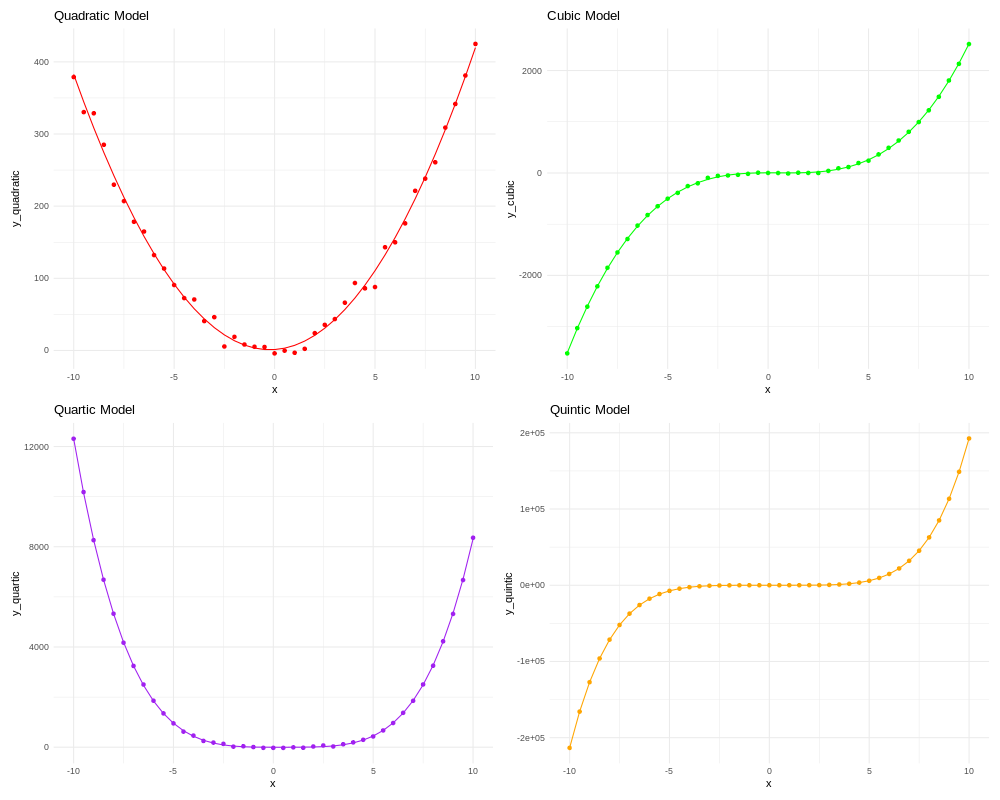

In [21]:
%%R -w 1000 -h 800 -u px
#| fig.width: 10
#| fig.height: 8
library(patchwork)
(p2 + p3) / (p4 + p5)


## Summary and Conclusions

Polynomial models are versatile tools for modeling a wide range of relationships. By choosing the appropriate degree and considering the number of variables, polynomial models can capture complex patterns and provide valuable insights in various fields. When fitting polynomial models, it is essential to consider the trade-off between model complexity and overfitting. By evaluating the model's performance and selecting the best-fitting polynomial, researchers and analysts can gain deeper insights into the underlying relationships in the data. Polynomial models are widely used in statistics, machine learning, physics, economics, and other disciplines to model nonlinear relationships and make predictions based on the data. This tutorial has provided an overview of polynomial models, their applications, and how to fit different types of polynomial models in R.


## References

Here are some useful resources related to polynomial models and polynomial regression tutorials:

### Polynomial Model Resources

1. [Modeling with Polynomials—An Introduction](https://www.insidemathematics.org/sites/default/files/assets/classroom-videos/public-lessons/11th-12th-grade-algebra-ii-modeling-polynomials/11th_12th_grade_algebra_ii_modeling_polynomials_an_introduction_teacher.pdf) - Inside Mathematics
2. [Modeling with Polynomial Functions](https://static.bigideasmath.com/protected/content/ipe/fl23/fl23_algebra2_ipe_04_08.pdf) - Big Ideas Learning
3. [Modeling with Polynomial Functions](https://math.libretexts.org/Bookshelves/Precalculus/Active_Prelude_to_Calculus_(Boelkins)/05%3A_Polynomial_and_Rational_Functions/5.03%3A_Modeling_with_polynomial_functions) - Mathematics LibreTexts
4. [Modeling with Polynomial Functions](https://flexbooks.ck12.org/cbook/ck-12-interactive-algebra-2-for-ccss-2nd-edition/section/4.6/primary/lesson/4.6-modeling-with-polynomial-functions/?assignment=4334) - CK-12 Interactive Algebra 2

### Polynomial Regression Tutorials
1. [An Introduction to Polynomial Regression](https://www.statology.org/polynomial-regression/) - Statology
2. [Implementation of Polynomial Regression](https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/) - GeeksforGeeks
3. [Polynomial Regression in Machine Learning](https://www.tutorialspoint.com/machine_learning/machine_learning_polynomial_regression.htm) - Online Tutorials Library
4. [Polynomial Regression with Examples in Machine Learning](https://learnetutorials.com/machine-learning/polynomial-regression) - Learn eTutorials
5. [Multiple Linear Regression and Polynomial Regression](https://compneuro.neuromatch.io/tutorials/W1D2_ModelFitting/student/W1D2_Tutorial4.html) - Neuromatch Tutorials

